In [1]:
#---- for high-quality plots
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 196

## 挿入用のコード

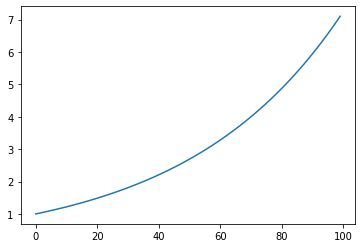

In [2]:
#---- ch05/growth-graph/plot

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(100)
y = (1 + 0.02) ** t
plt.plot(t, y)
plt.show()

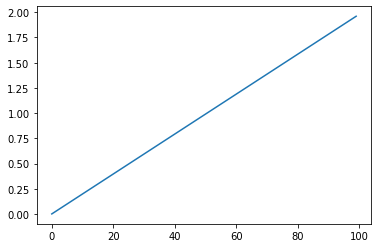

In [3]:
#---- ch05/growth-graph-log/plot
plt.plot(t, np.log(y))
plt.show()

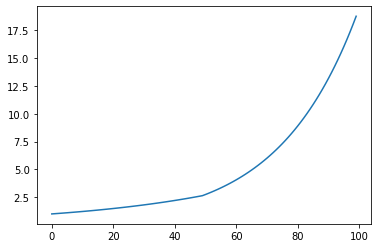

In [4]:
#---- ch05/growth-change/plot
y2 = np.empty_like(y)
y2[:50] = (1 + 0.02) ** t[:50]
y2[50:] = y2[49] * (1 + 0.04) ** (t[50:] - 49)
plt.plot(t, y2)
plt.show()

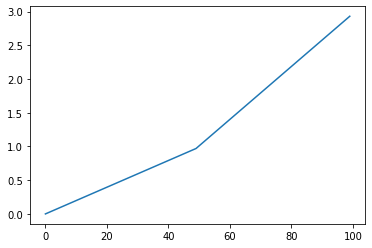

In [5]:
#---- ch05/growth-change-log/plot
plt.plot(t, np.log(y2))
plt.show()

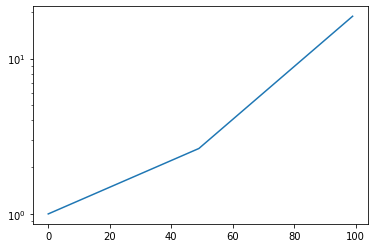

In [6]:
#---- ch05/growth-log-scale/plot
plt.plot(t, y2)
plt.yscale('log')
plt.show()

## Python の基本型

In [7]:
#---- ch05/string-1
s1 = "Hello, world."
s1

'Hello, world.'

In [8]:
#---- ch05/string-2
s2 = 'こんにちは'
s2

'こんにちは'

In [9]:
#---- ch05/string-3
s1[0]
s1[1:3]
s1[-1]

'.'

In [10]:
#---- ch05/string-list
list(s2)

['こ', 'ん', 'に', 'ち', 'は']

In [11]:
#---- ch05/string-for
for i, s in enumerate(s2):
    print(s * (i + 1))

こ
んん
ににに
ちちちち
ははははは


In [12]:
#---- ch05/f-string
x, y = 10, 20
f"{x} + {y} = {x + y}"

'10 + 20 = 30'

In [13]:
#---- ch05/f-string-format
f"{x} / ({x} + {y}) ≒ {x / (x + y):.2f}"

'10 / (10 + 20) ≒ 0.33'

### 辞書

In [14]:
#---- ch05/define-dict
d = {1: 100, 'a': 200, 'x': [1, 2]}
d

{1: 100, 'a': 200, 'x': [1, 2]}

In [15]:
#---- ch05/read-dict
d[1]
k = 'a'
d[k]

200

In [16]:
#---- ch05/loop-dict
for key in d:
    print(key)

1
a
x


In [17]:
#---- ch05/loop-dict2
for k, v in d.items():
    print(f"{k} : {v}")

1 : 100
a : 200
x : [1, 2]


### Pandas 入門

In [18]:
#---- ch05/pandas-no-indices
import pandas as pd
x = np.arange(12.0).reshape(4, 3)
pd.DataFrame(x)

,0,1,2
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0


In [19]:
#---- ch05/pandas-with-indices
frame = pd.DataFrame(x, columns=['a', 'b', 'c'], 
                     index=pd.PeriodIndex(range(2000, 2004), freq='A'))
frame

,a,b,c
2000,0.0,1.0,2.0
2001,3.0,4.0,5.0
2002,6.0,7.0,8.0
2003,9.0,10.0,11.0


In [20]:
#---- ch05/pandas-define-with-dict
pd.DataFrame({'a': [0.0, 3.0, 6.0, 9.0],
              'b': [1.0, 4.0, 7.0, 10.0],
              'id': list('xyzw')},
              index=range(2000, 2004))

,a,b,id
2000,0.0,1.0,x
2001,3.0,4.0,y
2002,6.0,7.0,z
2003,9.0,10.0,w


In [21]:
#---- ch05/pandas-diff
frame.diff()

,a,b,c
2000,NaN,NaN,NaN
2001,3.0,3.0,3.0
2002,3.0,3.0,3.0
2003,3.0,3.0,3.0


In [22]:
#---- ch05/pandas-pct-change
frame.pct_change().dropna()

,a,b,c
2001,inf,3.000000,1.500
2002,1.0,0.750000,0.600
2003,0.5,0.428571,0.375


In [23]:
#---- ch05/pandas-get-columns
frame.a
frame['b']
frame[['a', 'c']]

,a,c
2000,0.0,2.0
2001,3.0,5.0
2002,6.0,8.0
2003,9.0,11.0


In [24]:
#---- ch05/pandas-get-rows
frame.loc['2000':'2002', :]

,a,b,c
2000,0.0,1.0,2.0
2001,3.0,4.0,5.0
2002,6.0,7.0,8.0


In [25]:
#---- ch05/pandas-add-column
frame['d'] = frame.b * frame.c + 10
frame

,a,b,c,d
2000,0.0,1.0,2.0,12.0
2001,3.0,4.0,5.0,30.0
2002,6.0,7.0,8.0,66.0
2003,9.0,10.0,11.0,120.0


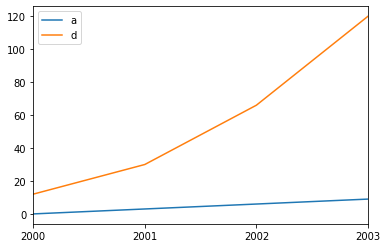

In [26]:
#---- ch05/pandas-plot/plot
frame.plot(y = ['a', 'd'])
plt.show()

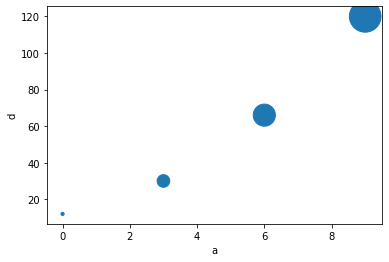

In [27]:
#---- ch05/pandas-scatter/plot
frame.plot.scatter(x='a', y='d', s=10 * frame.b ** 2)
plt.show()

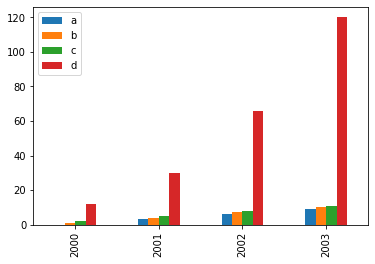

In [28]:
#---- ch05/pandas-bar/plot
frame.plot.bar()
plt.show()

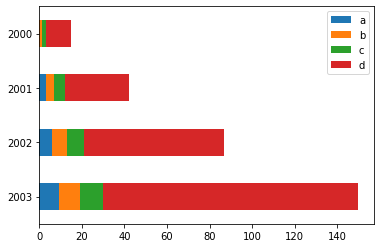

In [29]:
#---- ch05/pandas-barh/plot
ax = frame.plot.barh(stacked=True)
ax.invert_yaxis()
plt.show()

## pandas-datareader

In [30]:
#---- ch05/pandas-datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### FRED

In [31]:
#---- ch05/pandas-fred-gdp
gdp = pdr.get_data_fred(['GDPPOT', 'GDPC1'], 
                        start='1960-01-01', end='2020-04-01')
gdp

,GDPPOT,GDPC1
DATE,,
1960-01-01,3241.841643,3275.757
1960-04-01,3274.259913,3258.088
1960-07-01,3307.180570,3274.029
1960-10-01,3340.111502,3232.009
1961-01-01,3373.875049,3253.826
...,...,...
2019-04-01,18903.140000,19021.860
2019-07-01,19000.870000,19121.112
2019-10-01,19099.880000,19221.970


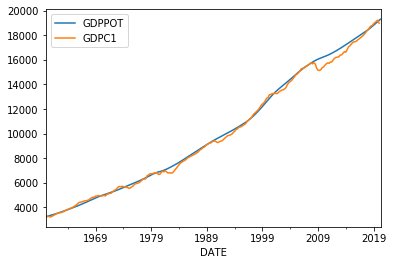

In [32]:
#---- ch05/pandas-fred-gdp/plot
gdp[['GDPPOT', 'GDPC1']].plot()
plt.show()

In [33]:
#---- ch05/pandas-fred-gdp-gap
gdp['gap'] = gdp['GDPC1'] - gdp['GDPPOT']
gdp['rgap'] = gdp['gap'] / gdp['GDPPOT']
gdp

,GDPPOT,GDPC1,gap,rgap
DATE,,,,
1960-01-01,3241.841643,3275.757,33.915357,0.010462
1960-04-01,3274.259913,3258.088,-16.171913,-0.004939
1960-07-01,3307.180570,3274.029,-33.151570,-0.010024
1960-10-01,3340.111502,3232.009,-108.102502,-0.032365
1961-01-01,3373.875049,3253.826,-120.049049,-0.035582
...,...,...,...,...
2019-04-01,18903.140000,19021.860,118.720000,0.006280
2019-07-01,19000.870000,19121.112,120.242000,0.006328
2019-10-01,19099.880000,19221.970,122.090000,0.006392


In [34]:
#---- ch05/pandas-fred-price
price = pdr.get_data_fred('CPIAUCSL', 
                          start='1960-01-01', end='2020-04-01')
price

,CPIAUCSL
DATE,
1960-01-01,29.370
1960-02-01,29.410
1960-03-01,29.410
1960-04-01,29.540
1960-05-01,29.570
...,...
2019-12-01,258.444
2020-01-01,258.820
2020-02-01,259.050


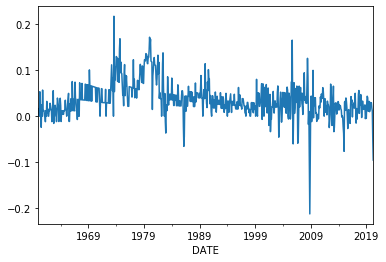

In [35]:
#---- ch05/pandas-fred-inflation/plot
price['inflation'] = price.CPIAUCSL.pct_change() * 12
price.inflation.plot()
plt.show()

In [36]:
#---- ch05/pandas-fred-ma
price['ma3'] = price.inflation.rolling(3, center=True).mean()
price['ma9'] = price.inflation.rolling(9, center=True).mean()
price

,CPIAUCSL,inflation,ma3,ma9
DATE,,,,
1960-01-01,29.370,NaN,NaN,NaN
1960-02-01,29.410,0.016343,NaN,NaN
1960-03-01,29.410,0.000000,0.023129,NaN
1960-04-01,29.540,0.053043,0.021743,NaN
1960-05-01,29.570,0.012187,0.027154,NaN
...,...,...,...,...
2019-12-01,258.444,0.028857,0.024691,-0.000894
2020-01-01,258.820,0.017458,0.018993,NaN
2020-02-01,259.050,0.010664,-0.007565,NaN


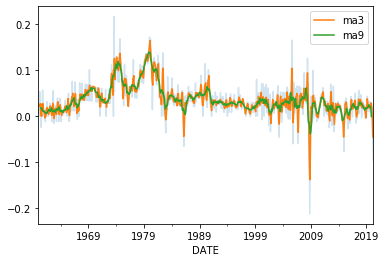

In [37]:
#---- ch05/pandas-fred-ma-plot/plot
ax = price.inflation.plot(alpha=0.2)
price[['ma3', 'ma9']].plot(ax = ax)
plt.show()

### World Bank

In [49]:
#---- ch05/wb-gdp
from pandas_datareader import wb
gdp = wb.download(indicator='NY.GDP.PCAP.CD', country='all',
                  start=1960, end=2010)
gdp

NY.GDP.PCAP.CD
country    year                
Arab World 2010     5946.380950
           2009     5183.095446
           2008     6143.344714
           2007     4960.663315
           2006     4356.830765
...                         ...
Zimbabwe   1964      281.558440
           1963      277.479715
           1962      276.688781
           1961      280.828951
           1960      278.813699

[13464 rows x 1 columns]

In [59]:
#---- ch05/wb-gdp-pivot
gdp_pivot = gdp.reset_index()
gdp_pivot['NY.GDP.PCAP.CD'] = np.log(gdp_pivot['NY.GDP.PCAP.CD'])
gdp_pivot = gdp_pivot.pivot(index='year', columns='country', 
                            values='NY.GDP.PCAP.CD')
gdp_pivot.index = gdp_pivot.index.astype('uint64')

In [60]:
#---- ch05/wb-gdp-pivot/dnr
gdp_pivot

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,4.090557,NaN,5.506586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.862178,NaN,NaN,NaN,6.113803,NaN,5.447551,5.630544
1961,4.092023,NaN,5.369597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.877663,NaN,NaN,NaN,6.139863,NaN,5.393819,5.637746
1962,4.068309,NaN,5.148924,NaN,NaN,NaN,NaN,NaN,7.052626,NaN,...,NaN,NaN,6.930842,NaN,NaN,NaN,6.193348,NaN,5.359310,5.622893
1963,4.365724,NaN,5.424509,NaN,NaN,NaN,NaN,NaN,6.745595,NaN,...,NaN,NaN,6.982309,NaN,NaN,NaN,6.247163,NaN,5.365492,5.625748
1964,4.407880,NaN,5.472475,NaN,NaN,NaN,NaN,NaN,7.067523,NaN,...,NaN,NaN,6.762119,NaN,NaN,NaN,6.318035,NaN,5.490525,5.640340
1965,4.616192,NaN,5.520995,NaN,NaN,NaN,NaN,NaN,7.153922,NaN,...,NaN,NaN,6.767959,NaN,NaN,NaN,6.382921,NaN,5.714663,5.681226
1966,4.924310,NaN,5.462127,NaN,NaN,NaN,NaN,NaN,7.148977,NaN,...,NaN,NaN,6.775542,NaN,NaN,NaN,6.443581,NaN,5.838819,5.624861
1967,5.080774,NaN,5.537034,NaN,NaN,NaN,NaN,NaN,6.968421,NaN,...,NaN,NaN,6.794451,NaN,NaN,NaN,6.485851,NaN,5.886664,5.677679
1968,4.860652,NaN,5.641644,NaN,NaN,NaN,NaN,5.412026,7.039731,NaN,...,NaN,NaN,6.843321,NaN,NaN,NaN,6.542261,NaN,6.015609,5.701776


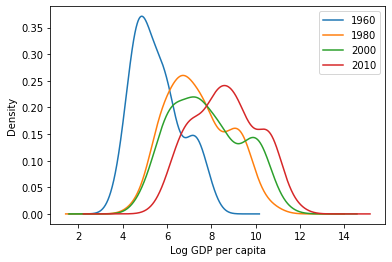

In [62]:
#---- ch05/wb-gdp-density/plot
years = [1960, 1980, 2000, 2010]
fig, ax = plt.subplots(1)
for year in years:
    gdp_pivot.loc[year].dropna().plot.density(ax=ax)
    
ax.legend(years)
ax.set_xlabel('Log GDP per capita')
plt.show()

## 作図用コード

In [42]:
#---- ch05/import2/noinc
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [43]:
#---- ch05/fred-gdp-read/noinc
fred = pdr.get_data_fred(['GDPPOT', 'GDPC1', 'PCEPI', 'NROU', 'UNRATE'], 
                         start='1960', end='2020-04-01')
fred

,GDPPOT,GDPC1,PCEPI,NROU,UNRATE
DATE,,,,,
1960-01-01,3241.841643,3275.757,16.346,5.456452,5.2
1960-02-01,NaN,NaN,16.363,NaN,4.8
1960-03-01,NaN,NaN,16.372,NaN,5.4
1960-04-01,3274.259913,3258.088,16.432,5.463051,5.2
1960-05-01,NaN,NaN,16.449,NaN,5.1
...,...,...,...,...,...
2019-12-01,NaN,NaN,110.530,NaN,3.5
2020-01-01,19197.590000,18974.702,110.678,4.438202,3.6
2020-02-01,NaN,NaN,110.763,NaN,3.5


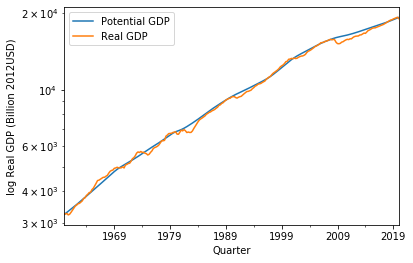

In [44]:
#---- ch05/fred-gdp/graphics
ax = fred[['GDPPOT', 'GDPC1']].dropna().plot()
ax.set_xlabel('Quarter')
ax.set_ylabel('log Real GDP (Billion 2012USD)')
ax.set_yscale('log')
ax.legend(['Potential GDP', 'Real GDP'])
plt.show()

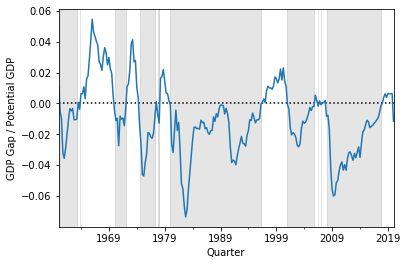

In [45]:
#---- ch05/gdp-gap/graphics
fred["GAP"] = (fred.GDPC1 - fred.GDPPOT) / fred.GDPPOT
fred["Inflation"] = fred.PCEPI.pct_change().shift(-1) * 12

GAP = fred.GAP.dropna()

ax = GAP.plot(color=['C0', 'k'])
x = np.linspace(*ax.get_xlim(), GAP.shape[0])
ylim = ax.get_ylim()
ax.hlines([0.0], xmin=x[0], xmax=x[-1], linestyle=':')
ax.fill_between(x, 0, 1, where=(GAP < 0), alpha=0.1, color='k',
                transform=ax.get_xaxis_transform())
ax.set_ylim(*ylim)
ax.set_xlabel('Quarter')
ax.set_ylabel('GDP Gap / Potential GDP')
plt.show()

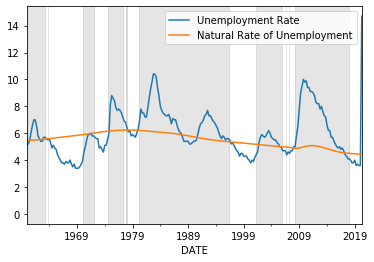

In [46]:
#---- ch05/fred-umemployment/graphics
fig, ax = plt.subplots(1)
fred[['UNRATE', 'NROU']].dropna().plot(ax=ax)
x = np.linspace(*ax.get_xlim(), GAP.shape[0])
ax.fill_between(x, 0, 1, where=(GAP < 0), alpha=0.1, color='k',
                transform=ax.get_xaxis_transform())
ax.legend(['Unemployment Rate', 'Natural Rate of Unemployment'])
plt.show()

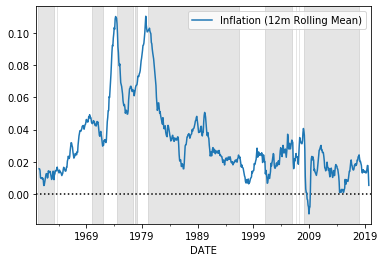

In [47]:
#---- ch05/fred-inflation/graphics
fig, ax = plt.subplots(1)
fred['Inflation'].dropna().rolling(12, center=True).mean().plot(ax=ax)
x = np.linspace(*ax.get_xlim(), GAP.shape[0])
ylim = ax.get_ylim()
ax.fill_between(x, 0, 1, where=(GAP < 0), alpha=0.1, color='k',
                transform=ax.get_xaxis_transform())
ax.hlines([0.0], xmin=ax.get_xlim()[0], 
          xmax=ax.get_xlim()[1], linestyle=':')
ax.set_ylim(*ylim)
ax.legend(['Inflation (12m Rolling Mean)'])
plt.show()

In [48]:
#---- END